In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

### Scraping data from website

In [2]:
# Scraping from Vietnamnet.vn
url = "https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/" 

In [3]:
temp_url = url + "02000001.html"
html = urlopen(temp_url)
print(html)

In [4]:
print(html.read())

b'<!DOCTYPE html>\r\n<html lang="vi" translate="no">\r\n    <head>\r\n        <meta charset="UTF-8">\r\n        <meta name="format-detection" content="telephone=no">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n        <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">\r\n        <title>Chi ti\xe1\xba\xbft \xc4\x91i\xe1\xbb\x83m thi t\xe1\xbb\x91t nghi\xe1\xbb\x87p THPT n\xc4\x83m 2022 c\xe1\xbb\xa7a s\xe1\xbb\x91 b\xc3\xa1o danh 02000001</title>\r\n        <meta name="google" content="notranslate"/>\r\n        <meta name="description" content="Chi ti\xe1\xba\xbft \xc4\x91i\xe1\xbb\x83m thi t\xe1\xbb\x91t nghi\xe1\xbb\x87p THPT n\xc4\x83m 2022 c\xe1\xbb\xa7a s\xe1\xbb\x91 b\xc3\xa1o danh 02000001 ch\xc3\xadnh x\xc3\xa1c nh\xe1\xba\xa5t tr\xc3\xaan b\xc3\xa1o VietNamNet." />\r\n        <meta name="keywords" content="tra c\xe1\xbb\xa9u \xc4\x91i\xe1\xbb\x83m thi, tra cuu diem thi, diem thi, tra cuu diem chuan, tra c\xe1\xbb\xa9u \

In [5]:
soup = BeautifulSoup(html.read(), "html.parser")
print(soup)

In [6]:
def Parse_web(url):
    try:
        # html = urlopen(url, context=ctx).read()
        html = urlopen(url).read()
        soup = BeautifulSoup(html, "html.parser")
        tags = soup("td")
        s = []
        for tag in tags:
            newline = str(tag.contents[0]).replace("\n", "").replace("\t", "")
            s.append(newline)
        return s
    except:
        return None

In [7]:
student = Parse_web(temp_url)
print(student)

['Toán', '7.4', 'Lí', '7.75', 'Hóa', '7.25', 'Sinh', '5.5', 'Văn', '7.25', 'Ngoại ngữ', '9.8']


### Create a dataframe

In [8]:
def process_id(id):
    if id < 10:
        return "0"
    return ""

# Create a dataframe
def Add_value_into_DataFrame(root_url, start_id, end_id):
    DataFrame = pd.DataFrame(columns=["ID", "Toán", "Lí", "Hóa", "Sinh","Văn","Ngoại ngữ", "GDCD", "Địa","Sử"])
    # DataFrame.astype(str)
    province_id = start_id[0] + start_id[1]
    province_id = process_id(int(province_id))
    
    for i in range(int(start_id), int(end_id) + 1):
        dict ={"ID": None,
            "Toán": -1,
            "Lí": -1,
            "Hóa": -1,
            "Sinh": -1,
            "Ngoại ngữ": -1,
            "Văn": -1,
            "GDCD": -1,
            "Địa": -1,
            "Sử": -1
        }
        id = province_id + str(i)
        dict["ID"] = id
        url = root_url + id + ".html"
        print(url)
        s = Parse_web(url)
        if ( s != None):
            size = len(s)
            for j in range(size):
                if (j % 2 == 0):
                    dict[s[j]] = float(s[j + 1])  
            DataFrame.loc[len(DataFrame.index)] = dict
    DataFrame.columns=["ID", "Toán", "Lí", "Hóa", "Sinh","Văn","Ngoại ngữ", "GDCD", "Địa","Sử"]
    DataFrame.index += 1
    DataFrame.columns=["ID", "Toán", "Lí", "Hóa", "Sinh","Văn","Ngoại ngữ", "GDCD", "Địa","Sử"]
    return DataFrame

In [9]:
DataFrame = Add_value_into_DataFrame(url, "02000001", "02000010")
print(DataFrame)

https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000001.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000002.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000003.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000004.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000005.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000006.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000007.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000008.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000009.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000010.html
          ID  Toán    Lí   Hóa  Sinh   Văn  Ngoại ngữ  GDCD  Địa    Sử
1   02000

In [10]:
DataFrame.to_csv("result_example.csv")

### Analyzing the data

In [11]:
print(DataFrame.loc[10])

ID           02000010
Toán              8.4
Lí               6.25
Hóa              7.75
Sinh             4.25
Văn               7.0
Ngoại ngữ         7.2
GDCD             -1.0
Địa              -1.0
Sử               -1.0
Name: 10, dtype: object


In [12]:
def process_id(id):
    if id < 10:
        return "0"
    return ""

# Create a dataframe
def CreateDataFrame(root_url, start_id, end_id):
    DataFrame = pd.DataFrame(columns=["ID", "Toán", "Lí", "Hóa", "Sinh","Văn","Ngoại ngữ", "GDCD", "Địa","Sử"])
    # DataFrame.astype(str)
    province_id = start_id[0] + start_id[1]
    province_id = process_id(int(province_id))
    
    for i in range(int(start_id), int(end_id) + 1):
        dict ={"ID": None,
            "Toán": -1,
            "Lí": -1,
            "Hóa": -1,
            "Sinh": -1,
            "Ngoại ngữ": -1,
            "Văn": -1,
            "GDCD": -1,
            "Địa": -1,
            "Sử": -1
        }
        id = province_id + str(i)
        dict["ID"] = id
        url = root_url + id + ".html"
        print(url)
        s = Parse_web(url)
        if ( s != None):
            size = len(s)
            for j in range(size):
                if (j % 2 == 0):
                    dict[s[j]] = float(s[j + 1])  
            DataFrame.loc[len(DataFrame.index)] = dict
    # DataFrame.columns=["ID", "Toán", "Lí", "Hóa", "Sinh","Văn","Ngoại ngữ", "GDCD", "Địa","Sử"]
    DataFrame.index += 1
    return DataFrame
        
def Parse_web(url):
    try:
        # html = urlopen(url, context=ctx).read()
        html = urlopen(url).read()
        soup = BeautifulSoup(html, "html.parser")
        tags = soup("td")
        s = []
        for tag in tags:
            newline = str(tag.contents[0]).replace("\n", "").replace("\t", "")
            s.append(newline)
        return s
    except:
        return None
# Collect data
class CollectData(object):
    def __init__(self, rooturl, startid, endid):
        self.dataframe = CreateDataFrame(rooturl, startid, endid)
        
    def SaveData(self, filename):
        self.dataframe.to_csv(filename)

In [13]:
DataFrame2022 = CollectData(url + "/2022/", "02000001", "02000005")
print(DataFrame2022.dataframe)
DataFrame2022.SaveData("_2022.csv")

https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022//2022/02000001.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022//2022/02000002.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022//2022/02000003.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022//2022/02000004.html
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022//2022/02000005.html
Empty DataFrame
Columns: [ID, Toán, Lí, Hóa, Sinh, Văn, Ngoại ngữ, GDCD, Địa, Sử]
Index: []


In [14]:
# Load the data into DataFrame
dataframe = pd.read_csv("result.csv", index_col = 0)
print(dataframe)

            ID  Toán    Lí   Hóa  Sinh   Văn  Ngoại ngữ  GDCD   Địa    Sử
0      2000001   7.4  7.75  7.25   5.5  7.25        9.8  -1.0 -1.00 -1.00
1      2000002   8.4  7.50  6.00   4.5  7.50        9.4  -1.0 -1.00 -1.00
2      2000003   8.4  6.50  7.00   4.5  6.50        4.2  -1.0 -1.00 -1.00
3      2000004   8.8  8.25  5.25   6.0  5.50        8.8  -1.0 -1.00 -1.00
4      2000005   7.2 -1.00 -1.00  -1.0  7.25        9.4   7.5  4.50  6.00
...        ...   ...   ...   ...   ...   ...        ...   ...   ...   ...
84505  2084996   8.2  7.25  6.25   4.5  6.75        8.2  -1.0 -1.00 -1.00
84506  2084997   5.8 -1.00 -1.00  -1.0  5.50       -1.0  -1.0  3.75  6.25
84507  2084998   6.6 -1.00 -1.00  -1.0  5.00       -1.0  -1.0  6.50  4.75
84508  2084999   6.4 -1.00 -1.00  -1.0  5.00       -1.0  -1.0  5.75  5.25
84509  2085000   7.4  8.50  7.50   4.5  6.25        9.4  -1.0 -1.00 -1.00

[84510 rows x 10 columns]


# Xử lí số liệu thống kê.(Mean, median, ...) ( Data Mining)

In [15]:
type(dataframe.loc[:, "Toán"].array)

pandas.core.arrays.numpy_.PandasArray

In [16]:
import matplotlib.pyplot as plt

In [17]:
def CountStudentOfSubject(subject,dataframe):
    subject = str(subject)
    df = dataframe.loc[dataframe[subject] >= 0]
    df = df[subject].array
    return len(df)
 
def PiePlot(list_subject, dataframe):
    y = []
    for index in range(len(list_subject)):
        len_sub = CountStudentOfSubject(list_subject[index], dataframe)
        y.append(len_sub)
    plt.figure(figsize = (20, 10))
    plt.pie(y, labels = list_subject, autopct='%1.0f%%', shadow=True)
    plt.title(label ="Biểu đồ hình tròn thể hiện số lượng thí sinh tham gia thi các môn.", 
              fontsize = 20, color = "green")
    pass
    

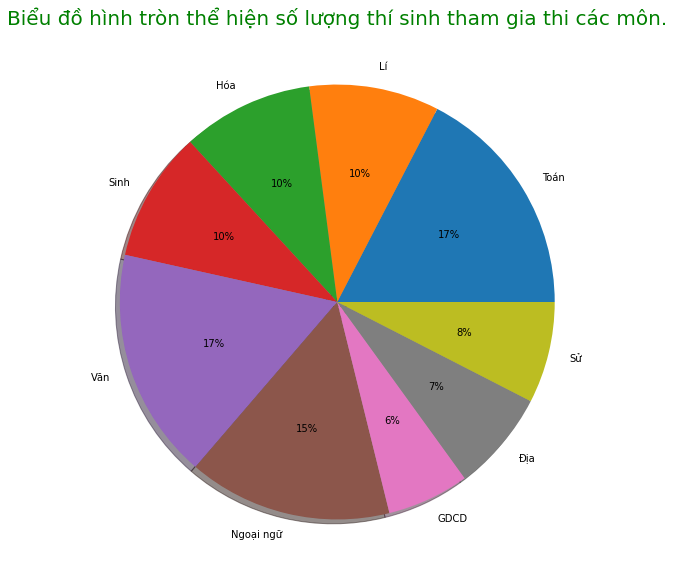

In [18]:
list_subject = ["Toán", "Lí", "Hóa", "Sinh","Văn","Ngoại ngữ", "GDCD", "Địa","Sử"]
PiePlot(list_subject, dataframe)

In [19]:
def BarPlot(subject, dataframe):
    # if the subject is "Toan" or "Ngoai ngu", score will be 0.2
    score_02 = ["Toán", "Ngọai ngữ"]
    
    if subject in score_02:
        default_score = {str(i/5): 0 for i in range(0, 51)}
    else:
        default_score = {str(i/4): 0 for i in range(0, 41)}
        
    df = dataframe.loc[dataframe[subject] >= 0][subject].array
    for i in df:
        default_score[str(i)] += 1
    labels = list(default_score.keys())
    y = list(default_score.values())
    
    plt.figure(figsize=[25, 10])
    rects1 = plt.bar(labels, y, 0.8, label = "Toan")
    for bar in rects1:
        plt.annotate(bar.get_height(), (bar.get_x() - 0.1, bar.get_height()+20), fontsize = 10)
    plt.xlabel('Điểm.', fontsize = 20)
    plt.ylabel('Số lượng học sinh.', fontsize = 20)
    plt.title("Biểu đồ phổ điểm thi THPT môn " + subject + " năm 2022.", fontsize = 30)
    plt.show()
    pass

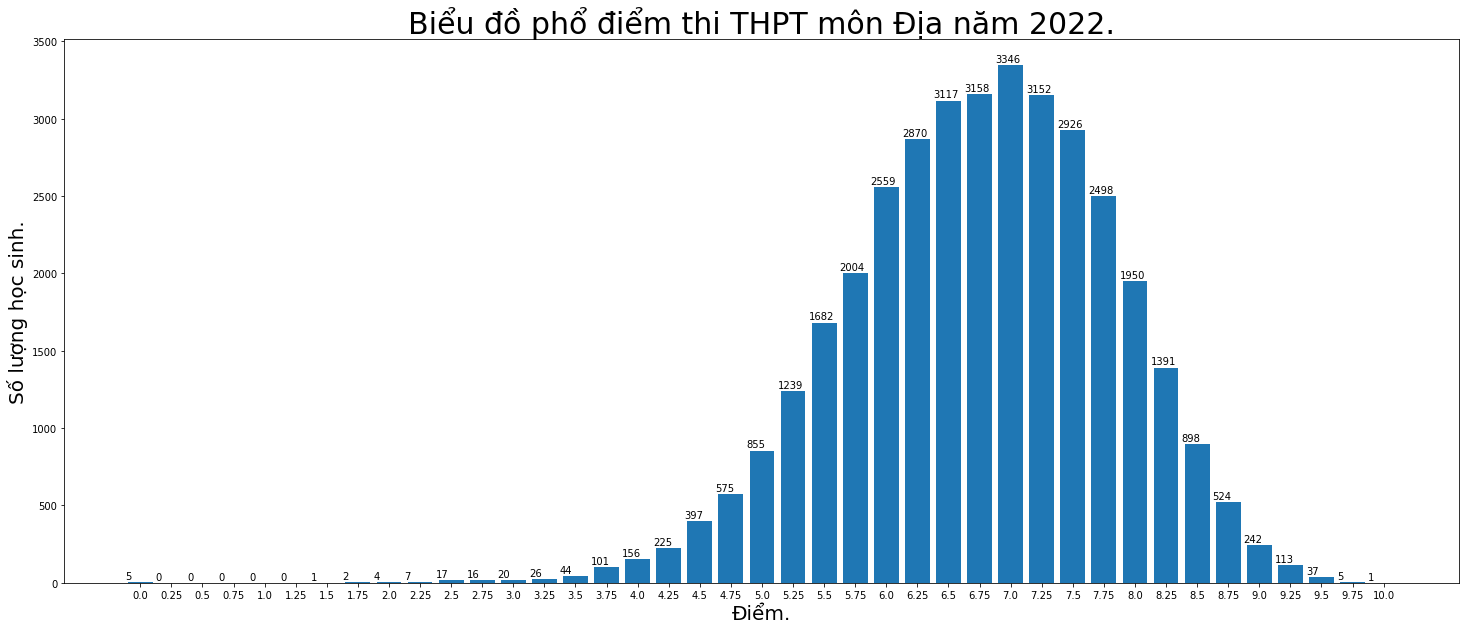

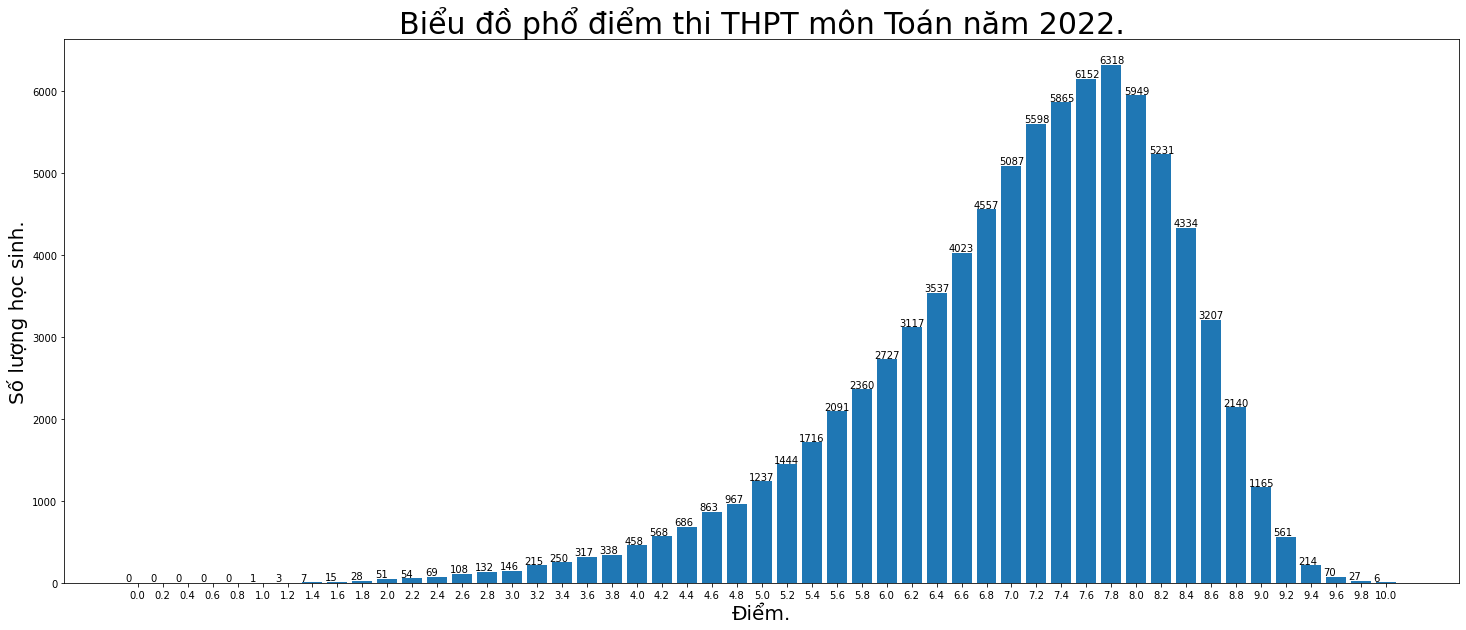

In [20]:
BarPlot("Địa", dataframe)
BarPlot("Toán", dataframe)


In [21]:
# chờ dữ liệu 2021, 2020,..
# mean score of subjects

def MeanPlot(list_subject, dataframe):
    y_mean = []
    for subject in list_subject:
        y_mean.append(round(dataframe.loc[dataframe[subject] >= 0][subject].mean(axis =0), 3))
    plt.figure(figsize=[16, 7])
    rects1 = plt.bar(list_subject, y_mean, 0.6, label = "Toan")
    for bar in rects1:
        plt.annotate(bar.get_height(), (bar.get_x() + 0.1, bar.get_height()+ 0.1), fontsize = 10)
    plt.xlabel("Môn thi", fontsize = 20)
    plt.ylabel("Điểm số trung bình.", fontsize = 20)
    plt.title("Biểu đồ thể hiện số điểm trung bình các môn thi THPT năm 2022.", fontsize = 25)
    plt.show()

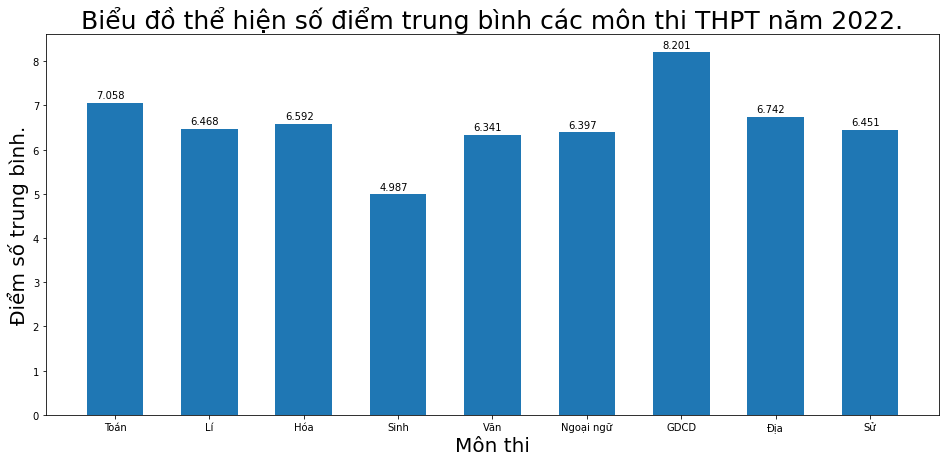

In [22]:
list_subject = ["Toán", "Lí", "Hóa", "Sinh","Văn","Ngoại ngữ", "GDCD", "Địa","Sử"]
MeanPlot(list_subject, dataframe)

# Làm số điểm (10 or liet ) của các môn ( biểu đồ cột)

In [23]:
# chơ dữ liệu năm 2021, 2019,..
def SpecialScoreChart(list_subject, dataframe, type):
    count_score = {subject : 0 for subject in list_subject}
    for subject in list_subject:
        if type == "maximum":
            count_score[subject] = len(dataframe[dataframe[subject] == 10])
        if type == "paralysis":
            subdataframe = dataframe[dataframe[subject] >= 0]
            count_score[subject] = len(subdataframe[ subdataframe[subject] <= 1])
    plt.figure(figsize=[16, 7])
    rects1 = plt.bar(count_score.keys(), count_score.values(), 0.6, label = "Toan")
    for bar in rects1:
        plt.annotate(bar.get_height(), (bar.get_x() + 0.2, bar.get_height()+ 0.1), fontsize = 15)
    plt.xlabel("Môn thi", fontsize = 20)
    plt.ylabel("Số điểm 10.", fontsize = 20)
    if type == "maximum":
        plt.title("Biểu đồ thể hiện số điểm 10 các môn thi THPT năm 2022.", fontsize = 25)
        plt.ylabel("Số điểm 10.", fontsize = 20)
    else:
        plt.title("Biểu đồ thể hiện số điểm liệt các môn thi THPT năm 2022.", fontsize = 25)
        plt.ylabel("Số điểm liệt.", fontsize = 20)
    plt.show()
    pass

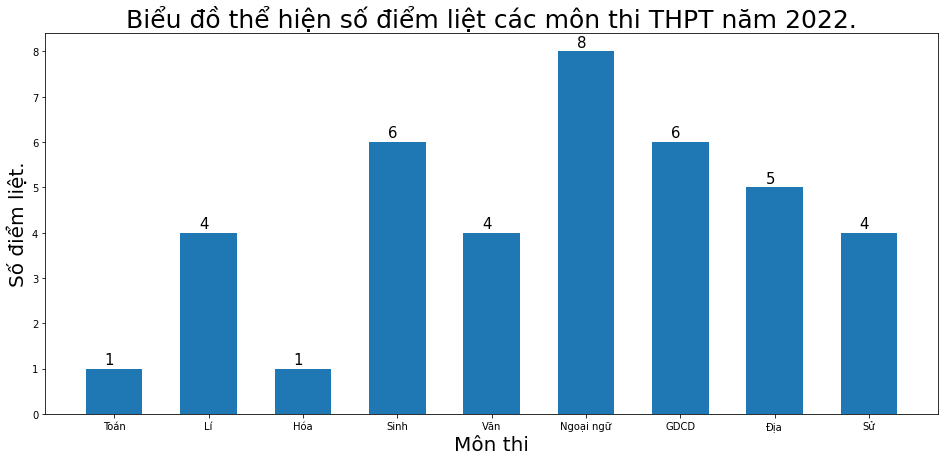

In [24]:
list_subject = ["Toán", "Lí", "Hóa", "Sinh","Văn","Ngoại ngữ", "GDCD", "Địa","Sử"]
SpecialScoreChart(list_subject, dataframe, type = "paralysis")


# Làm tổ hợp các môn. A, A01, B0,...

In [140]:
def set_location(MeanBlock):
    location = []
    j = 0
    for i in range(4*len(MeanBlock.keys())):
        if (i > 0 and i % 4 == 0):
            j = location[i - 1] +3   
        location.append(j)
        j += 1
    label = []
    for block in MeanBlock.keys():
        meansubject = MeanBlock[block][1]
        for subject in meansubject.keys():
            label.append(subject)
        label.append(block)
        
    return location, label
    
# subject of block = { A: ["Toan", "li", 'Hoa],...} is a dictionary.
def MeanBlockChart(blocksubject, dataframe):
    MeanBlock = {block: [] for block in blocksubject.keys()}
    for block in blocksubject.keys():
        subdataframe = dataframe[blocksubject[block]]
        for subject in blocksubject[block]:
            subdataframe = subdataframe[subdataframe[subject]  >= 0]
            
        MeanSubject = round(subdataframe.mean(), 3)
        MeanBlock[block].append(round(subdataframe.mean().mean(), 3))
        MeanBlock[block].append(MeanSubject)
        
    plt.figure(figsize=[16, 7])
    width = 1
    index = 0
    color = ["red", "green", "orange", "blue"]
    location, label = set_location(MeanBlock)
    y = []
    list_color = []
    
    for block in MeanBlock.keys():
        mean_subject = MeanBlock[block][1]
        i = 0
        for subject in mean_subject.keys(): 
            y.append(mean_subject[subject])
            list_color.append(color[i])
            i +=1 
        y.append(MeanBlock[block][0])
        list_color.append(color[i])

    rects1 = plt.bar(location, y, width, label = subject, color = list_color) 
    for bar in rects1:
        plt.annotate(bar.get_height(), (bar.get_x() + 0.1 , bar.get_height()+ 0.1), fontsize = 10)
        
    plt.xticks(location, label, fontsize = 10)      
    plt.xlabel("Môn thi", fontsize = 20)
    plt.ylabel("Điểm số trung bình.", fontsize = 20)
    plt.title("Biểu đồ thể hiện số điểm trung bình các môn và khối thi THPT năm 2022.", fontsize = 25) 
    # plt.legend()
    plt.show()
    pass 

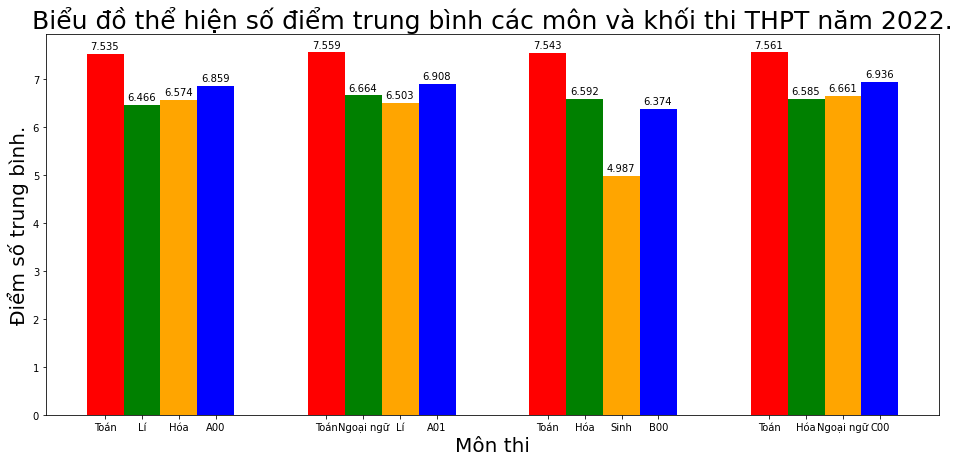

In [141]:
a = MeanBlockChart({'A00': ["Toán", "Lí", "Hóa"], "A01": ["Toán", "Ngoại ngữ", "Lí"], "B00": ["Toán", "Hóa", "Sinh"], "C00": ["Toán", "Hóa", "Ngoại ngữ"]}, dataframe)

# So sánh giữa 2 năm 2022 và 2021.
<ol>
    <li> So sanh so diem 10(ve do duong ket hop cot ung dung cac ham o tren) </li>
    <li> So sanh so diem 0 </li>
    <li> So sanh to hop cac mon </li>
</ol>

# Predict số điểm trung bình năm 2022 qua 3 năm 2019, 2020, 2021. sau đó kết hợp số điểm năm 2022 và dự đoán cho năm 2023. ( có thể dùng linear regression model or random forest desission tree )